In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Importing the data

In [48]:
rawcounts = pd.read_csv("data/Raw_counts_prefiltered.csv", index_col="Unnamed: 0")

# rowns :
#########
if rawcounts.index.is_unique:
    rawcounts.index = rawcounts.index.str.split(".", n = 1).str[0]

# columns :
###########
rawcounts.columns = rawcounts.columns.str.split("_S", n = 1).str[0]

# Show data :
#############
rawcounts.head(4)

,siC8_n1,siC8_n2,siC8_n3,siC8_n4,siC8_n5,siC8_n6,siLuc_n1,siLuc_n2,siLuc_n3,siLuc_n4,siLuc_n5,siLuc_n6
ENSG00000290825,0,0,0,0,1,3,0,0,0,0,1,2
ENSG00000310526,167,124,201,175,174,114,100,176,96,141,680,139
ENSG00000243485,0,0,2,0,1,0,0,1,0,0,0,0
ENSG00000241860,1,1,1,0,0,0,6,6,0,1,11,1


In [49]:
Experimental = pd.DataFrame(index= rawcounts.columns,
                           data= {"Conditions" : rawcounts.columns.str.split("_").str[0],
                                  "Replicate" : rawcounts.columns.str.split("_").str[1]})

Experimental.head(4)

,Conditions,Replicate
siC8_n1,siC8,n1
siC8_n2,siC8,n2
siC8_n3,siC8,n3
siC8_n4,siC8,n4


## Counts distribution

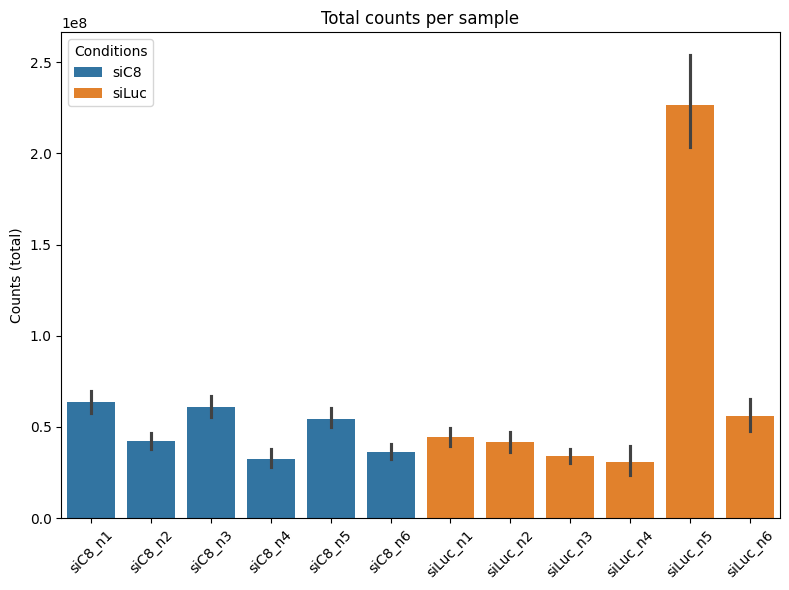

In [72]:
# go to long format ()equivalent of 'pivot_longer' in R) :
# ========================================================
df_long = rawcounts.reset_index().melt(id_vars="index", var_name="Samples", value_name="Counts")

# Add metadata (Condition column) :
# =================================
df_long["Conditions"] = df_long["Samples"].str.split("_").str[0]

# Creating the barplot :
# ======================
plt.figure(figsize=(8,6))
sns.barplot(data=df_long, 
            x="Samples", 
            y="Counts",
            hue="Conditions",
            estimator=sum)

plt.xticks(rotation=45)
plt.ylabel("Counts (total)")
plt.xlabel("")
plt.title("Total counts per sample")
plt.tight_layout()
plt.show()

## Removing n5